AI Timeline Columns: Index(['Title', 'Date', 'Company'], dtype='object')


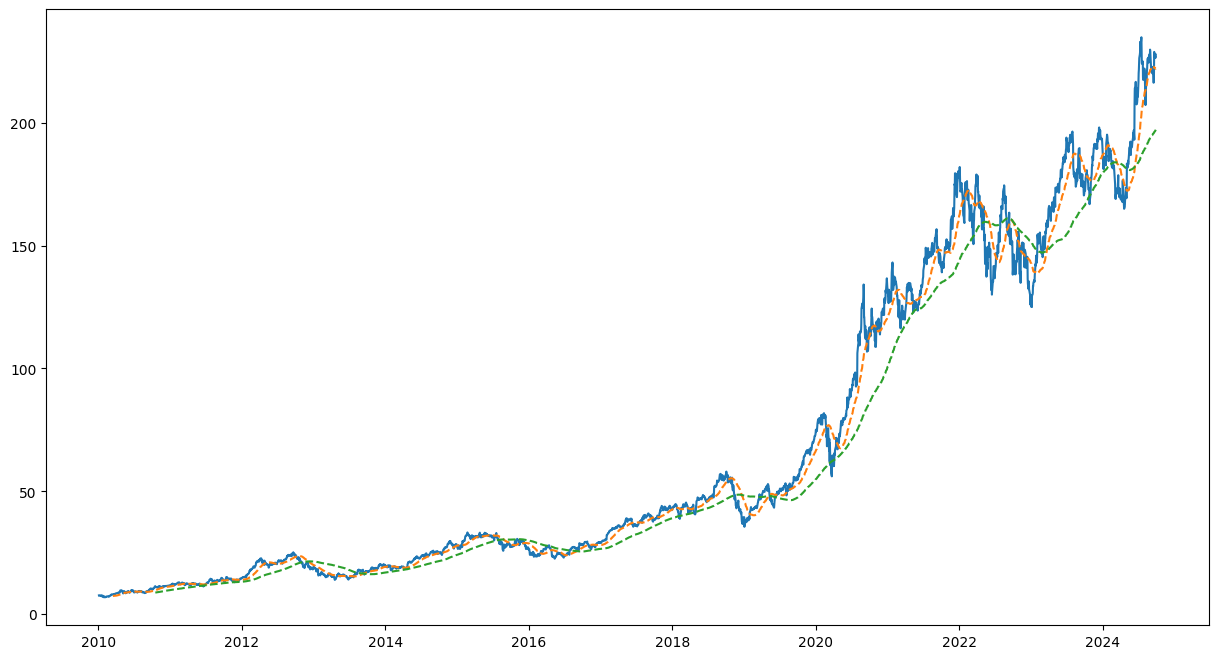

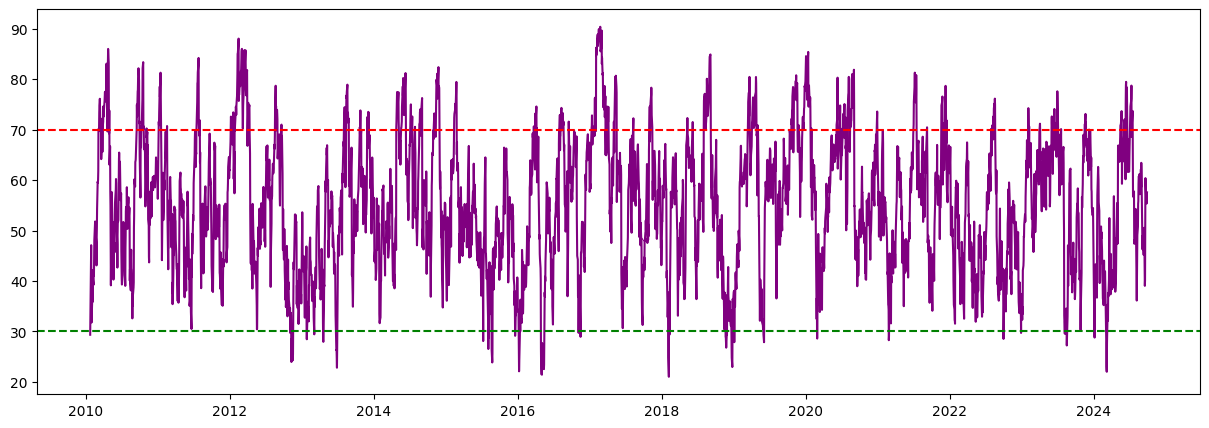

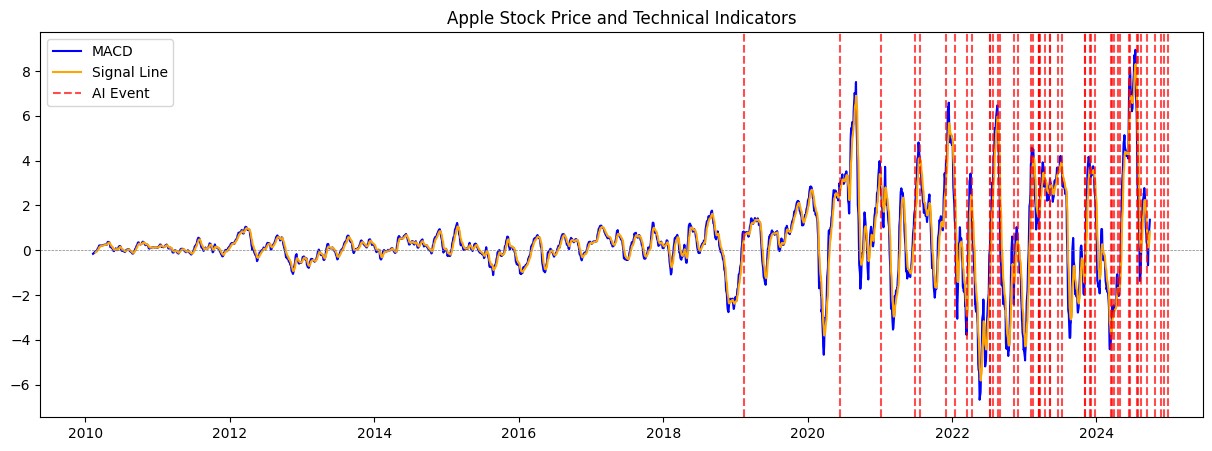

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import RSIIndicator
from ta.trend import MACD
from ta.volatility import BollingerBands

# Data Loading
forex_rates_path = "/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Background Data/forex_rates.csv"
stock_exchange_path = "/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Background Data/stock_exchange_currency_info.csv"
ai_timeline_path = "/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Background Data/timeline_of_the_ai.csv"
stock_metadata_path = "/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_metadata_top100.csv"
stock_timeseries_path = "/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Extracted Data/stock_timeseries_different_currency.csv"

data_analysis_path = "/Users/erolberkiyibozkurt/Documents/GitHub/Python/Projects/The Influence of AI Boom on Tech Stocks/Data Analysis"

# Load datasets
forex_rates = pd.read_csv(forex_rates_path)
stock_exchange = pd.read_csv(stock_exchange_path)
ai_timeline = pd.read_csv(ai_timeline_path)
stock_metadata = pd.read_csv(stock_metadata_path)
stock_timeseries = pd.read_csv(stock_timeseries_path)

# Check and Correct Column Names
print("AI Timeline Columns:", ai_timeline.columns)

# Assuming the date column might have a different name
correct_date_column = "Date" if "Date" in ai_timeline.columns else ai_timeline.columns[0]
ai_timeline[correct_date_column] = pd.to_datetime(ai_timeline[correct_date_column])

# Format Dates
stock_timeseries['Date'] = pd.to_datetime(stock_timeseries['Date'])

# Apply Technical Indicators
selected_stock = stock_timeseries[stock_timeseries['Symbol'] == 'AAPL']  # Apple example
selected_stock = selected_stock.sort_values(by='Date')

# Calculate RSI
rsi = RSIIndicator(close=selected_stock['Close'], window=14).rsi()
selected_stock['RSI'] = rsi

# Calculate MACD
macd_indicator = MACD(close=selected_stock['Close'])
selected_stock['MACD'] = macd_indicator.macd()
selected_stock['Signal_Line'] = macd_indicator.macd_signal()

# Calculate Moving Averages
selected_stock['SMA_50'] = selected_stock['Close'].rolling(window=50).mean()
selected_stock['SMA_200'] = selected_stock['Close'].rolling(window=200).mean()

# Merge Data for Event-Based Analysis
merged_data = pd.merge(selected_stock, ai_timeline, left_on='Date', right_on=correct_date_column, how='left')

# Plotting
plt.figure(figsize=(15, 8))

# Stock Price and SMA
plt.plot(selected_stock['Date'], selected_stock['Close'], label='Close Price', linewidth=1.5)
plt.plot(selected_stock['Date'], selected_stock['SMA_50'], label='SMA 50', linestyle='--')
plt.plot(selected_stock['Date'], selected_stock['SMA_200'], label='SMA 200', linestyle='--')

# RSI Indicator
plt.figure(figsize=(15, 5))
plt.plot(selected_stock['Date'], selected_stock['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')

# MACD Indicator
plt.figure(figsize=(15, 5))
plt.plot(selected_stock['Date'], selected_stock['MACD'], label='MACD', color='blue')
plt.plot(selected_stock['Date'], selected_stock['Signal_Line'], label='Signal Line', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Highlight Events with Vertical Lines
for event_date in ai_timeline[correct_date_column]:
    plt.axvline(event_date, color='red', linestyle='--', alpha=0.7, label='AI Event' if event_date == ai_timeline[correct_date_column].iloc[0] else "")

plt.legend()
plt.title('Apple Stock Price and Technical Indicators')
plt.show()

# Save Data
selected_stock.to_csv(f"{data_analysis_path}/apple_stock_analysis.csv", index=False)


In [2]:
pip install ta

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29482 sha256=b32b470f3456096832e20e7c6bf23be098cf5fa7c907436acdac9ee06685078d
  Stored in directory: /Users/erolberkiyibozkurt/Library/Caches/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
Note: you may need to restart the kernel to use updated packages.
